# 1 Introduction

In order to develop new methods or to compare existing methods for feature selection, reference data with known dependencies and importance of the individual features are needed. This data generator can be used to simulate biological data for example artificial high-throughput data including artificial biomarkers. Biomarkers in general are measurable indicators of a biological state or condition. They can be used to diagnose diseases, predict the risk of disease, and monitor the progress of disease. High-throughput data is a type of data that is generated in large quantities and at a high speed. It is often used in the context of biological research and refers to the collection and analysis of data from high-throughput technologies such as microarrays, next-generation sequencing, and mass spectrometry. Within this context possible biomarker candidates are the measured features.

Since commonly not all true biomarkers and internal dependencies of high-dimensional biological datasets are known with certainty, artificial data enables to know the expected outcome in advance. Random effects become observable and the performance of feature selection algorithms can be tested. In synthetic data, the feature importances and the distribution of each class are known. Irrelevant features can be purely random or belong to a pseudo-class. Such a pseudo-class, for example, could be a patient’s height or gender, which are not related to a specific disease.

# 2 Data structure
The artificial-data-generator produces data sets consisting of up to three main parts:
1. **Relevant features** belonging to an artificial class (for example artificial biomarkers)
2. [optional] **Pseudo-classes** (for example a patient's height or gender, which have no association with a particular disease)
3. [optional] **Random data** representing the features (for example biomarker candidates) that are not associated with any class.

This is an example of simulated binary biological data including artificial biomarkers:
<div style="text-align:left">
    <img src="../docs/source/imgs/artificial_data.png" alt="Data example" width="900"/>
</div>

The number of artificial classes is not limited. Each class is generated individually and then combined with the others. Classes can be shifted to regulate the effect sizes and to influence the difficulty of data analysis. Effect size is a statistical concept that measures the strength of the relationship between two variables in a study. Unlike significance tests, which tell us if a relationship exists, effect size tells us how strong that relationship is. It helps us understand the practical importance of research results beyond mere statistical significance. For example, a large effect size means a substantial relationship or difference between groups, whereas a small effect size indicates a minor relationship.

# 3 Data generator parameters
Default values for high dimensional data with few samples (short fat data):
The **number of features** is much larger than the **number of samples**. This is a common problem in bioinformatics and other fields. In this case, the number of features is much larger than the number of samples. This can lead to overfitting and other problems. The artificial data generator can be used to generate data with a large number of features and a small number of samples. This can be used to test feature selection algorithms and other methods for high dimensional data with few samples.


The data generator and its resulting outputs can be manipulated through different parameters. The subsequent section will provide an explanation of each parameter.

**Informative features** are the features that are relevant for the classification. They are potentially relevant to distinguish between the classes. The number of informative features is the number of features that are not random features and not pseudo class features.

One option for an element of the generated data set is a **pseudo-class**. For example, this could be a patient's height or gender, which are not related to a specific disease.

The generated pseudo-class contains the same number of classes with identical distributions as the artificial biomarkers. But after the generation of the individual classes, all samples (rows) are randomly shuffled. Finally, combining the shuffled data with the original, unshuffled class labels, the pseudo-class no longer has a valid association with any class label. Consequently, no element of the pseudo-class should be recognized as relevant by a feature selection algorithm.

Random features are features that are not relevant for the classification. They are used to test feature selection algorithms and other methods for high dimensional data with few samples.

In [11]:
# necessary imports
from artificial_data_generator import artificial_data_generator_tools
import warnings
from statsmodels.tools.sm_exceptions import IterationLimitWarning

# suppress warnings
warnings.filterwarnings("ignore", category=IterationLimitWarning)

In [12]:
# data generator parameters
number_of_samples_per_class = 15
number_of_informative_features = 60
number_of_pseudo_class_features = 16
number_of_random_features = 13000
number_of_correlated_features_clusters = 3
number_of_correlated_features_per_cluster = 10

data_name = "artificial_biomarker_data_1"

# 4 Generate normal distributed class 1 (e.g. healthy individuals)

For each class, either the normal distribution or the log normal distribution can be selected. The normally distributed data could, for example, represent the range of values of healthy individuals. We here select the default value of the scale = 1, but it can be adjusted to the desired value. Scale is a parameter that influences the spread of the distribution. The larger the scale, the larger the spread. 

Once the desired settings have been adjusted, we can proceed to generate the first entire class. The result and its distribution are displayed in a histogram. In the following, the distribution of the first class is shown and the influence of the scale parameter is visible.

Distribution of informative class features:


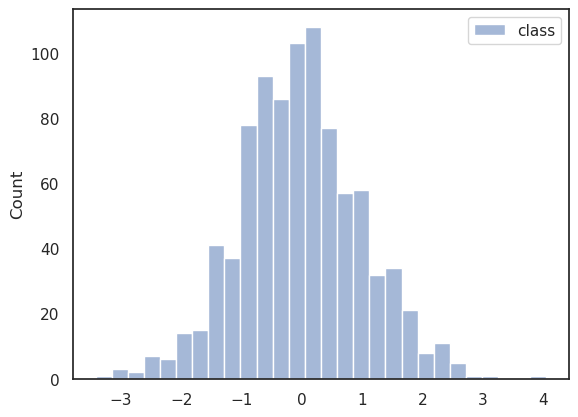

In [13]:
class1_data_array = artificial_data_generator_tools.build_class(
    number_of_samples_per_class=number_of_samples_per_class, 
    number_of_informative_features=number_of_informative_features, 
    scale=1
)

# 5 Generate log-normal distributed class 2 (e.g. diseased individuals)
In the case of a disease, biological systems are in some way out of balance. Extreme changes in values as well as outliers can then be observed ([Concordet et al., 2009](https://doi.org/10.1016/j.cca.2009.03.057)). Therefore, the values of a diseased patients could be simulated with a log-normal distribution. 


## 5.1 Generate clusters of correlated features
The biological system thrown out of balance must react to it. For example, this reaction can then happen in a coordinated manner involving several biomarkers, or corresponding cascades (e.g. pathways) can be activated or blocked. This can result in a rather stronger correlation of biomarkers in patients suffering from a disease. To simulate these intra-class correlations, a class can contain feature clusters with high internal correlation. The respective strength can be adjusted by defining upper and lower bound of the desired correlation. Only positive correlations can be calculated. These clusters are generated in the following cells. TODO: Reasonable values for the number of correlated features per cluster and the number of clusters should be defined.

generation of correlation matrix ...
generation of covariant matrix ...
min absolute correlation: 0.8214285714285714


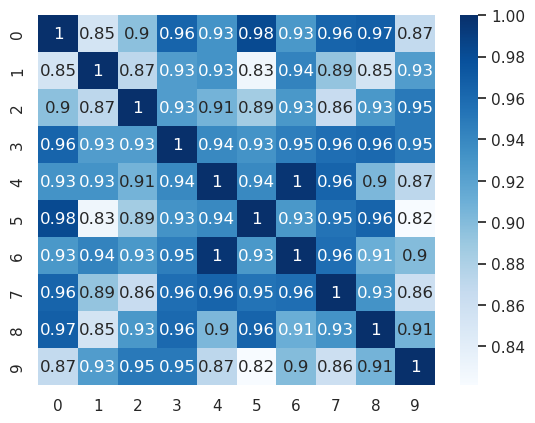

In [14]:
correlated_cluster_1 = artificial_data_generator_tools.generate_correlated_cluster(
    number_of_features=10,
    number_of_samples=number_of_samples_per_class,
    upper_bound=1,
    lower_bound=0.9,
    path_to_save_pdf=f"{directory_path_to_save_result}{data_name}_cluster1.pdf",
)

generation of correlation matrix ...
generation of covariant matrix ...
min absolute correlation: 0.8928571428571429


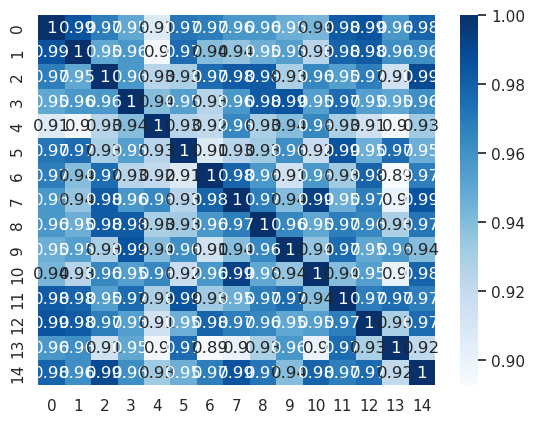

In [15]:
correlated_cluster_2 = artificial_data_generator_tools.generate_correlated_cluster(
    number_of_features=15,
    number_of_samples=number_of_samples_per_class,
    upper_bound=1,
    lower_bound=0.9,
    path_to_save_pdf=f"{directory_path_to_save_result}{data_name}_cluster2.pdf",
)

generation of correlation matrix ...
generation of covariant matrix ...
min absolute correlation: 0.8321428571428572


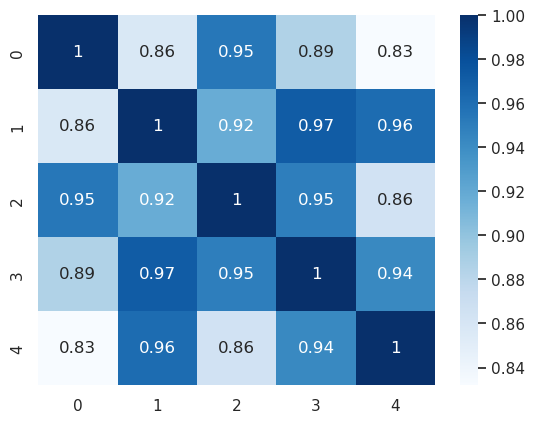

In [16]:
correlated_cluster_3 = artificial_data_generator_tools.generate_correlated_cluster(
    number_of_features=5,
    number_of_samples=number_of_samples_per_class,
    upper_bound=1,
    lower_bound=0.9,
    path_to_save_pdf=f"{directory_path_to_save_result}{data_name}_cluster3.pdf",
)

## 5.2 Combine the correlated clusters together with uncorrelated features to one class

Correlation matrix of correlated clusters:
min absolute correlation: 0.010714285714285714


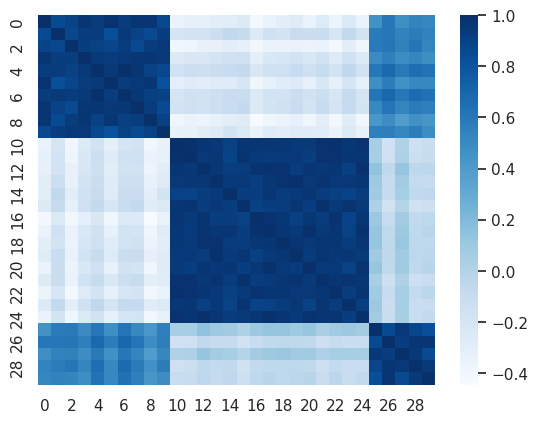

Distribution of informative class features:


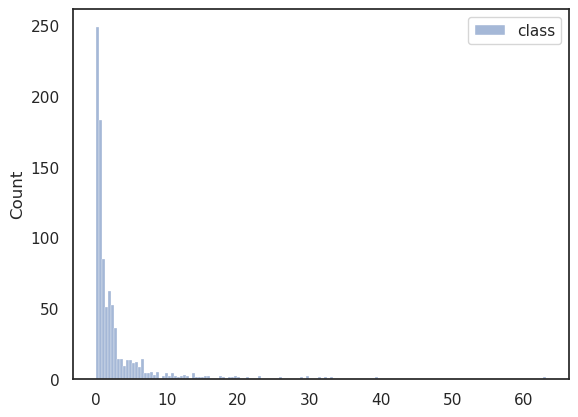

In [17]:
class2_data_array = artificial_data_generator_tools.build_class(
    number_of_samples_per_class=number_of_samples_per_class,
    number_of_informative_features=number_of_informative_features,
    scale=1.5,
    distribution="lognormal",
    correlated_clusters_list=[correlated_cluster_1, correlated_cluster_2, correlated_cluster_3]
)

## 5.3 Enlarge effect size
After the basic generation of the classes, the following diagram shows the distribution of the first class and the distribution of the second class after the transformation into a lognormal distribution. However, the generated classes may not yet be differentiable based on the distribution of the features, as the effect size can still be very small or non-existent as both classes were generated with an equal center. Therefore, the effect size is increased to influence the difficulty of data analysis. The larger the effect size the easier the feature selection. The effect size is regulated by shifting all values of the respective class by the given value for 'effect_size'. The result is visible in the plot below. To see the effect, compare both plots.

Equally centered distributions:


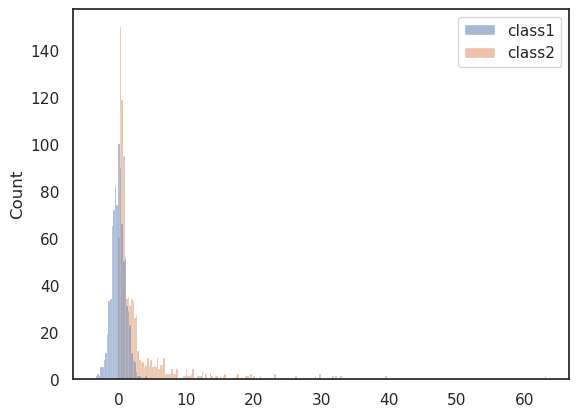

Increased effect size:


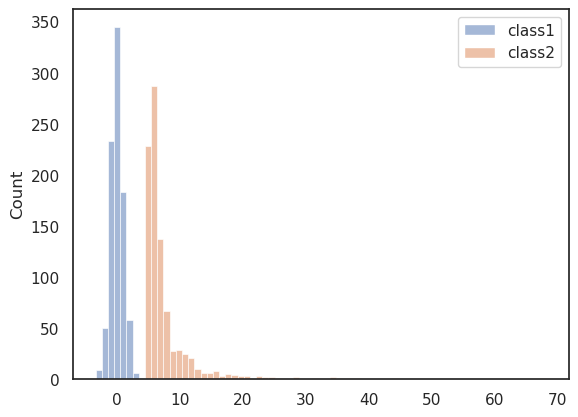

In [18]:
# show plot
print("Equally centered distributions:")
artificial_data_generator_tools.plot_distributions_of_all_classes(
    [class1_data_array, class2_data_array]
)
print("Increased effect size:")
# increase effectsize
shifted_class2_data_array = artificial_data_generator_tools.shift_class_to_enlarge_effectsize(
    class2_data_array, effect_size=5
)
# show plot
artificial_data_generator_tools.plot_distributions_of_all_classes(
    [class1_data_array, shifted_class2_data_array],
    path_to_save_pdf=f"{directory_path_to_save_result}{data_name}_class_distributions.pdf",
)

# 6 Generate artificial classification data
The individual parts of the data are combined to form the complete data set. The dataset consists of the following parts and in the following order:
- class labels
- informative features
- pseudo class features
- random features

In [19]:
artificial_data_df = artificial_data_generator_tools.generate_artificial_classification_data(
    generated_classes_list=[shifted_class2_data_array, class1_data_array],
    number_of_samples_per_class=number_of_samples_per_class, # for the generation of the pseudo class
    number_of_random_features=number_of_random_features,
    number_of_pseudo_class_features=number_of_pseudo_class_features,
    number_of_pseudo_classes=2,  # number of pseudo-classes equals the number of classes
)
assert (
    artificial_data_df.shape[1]
    == number_of_informative_features + number_of_pseudo_class_features + number_of_random_features + 1
)  # label column
print("The complete data set has the following shape:")
print(f"number of samples: {artificial_data_df.shape[0]}")
print(f"number of features: {artificial_data_df.shape[1]}")

The complete data set has the following shape:
number of samples: 30
number of features: 13077


# 7 Save CSV
In the final step, the data can be downloaded in CSV format and are ready for further analysis and processing.

In [20]:
artificial_data_df.to_csv(f"data/{data_name}.csv", index=False)